In [15]:
import sklearn

In [16]:
from sklearn.datasets import make_circles

samples=1000

# Using toy data
x,y=make_circles(n_samples=samples,noise=0.03, random_state=42)

In [17]:
import pandas as pd

circles=pd.DataFrame({"X1":x[:, 0], "X2":x[:,1], "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


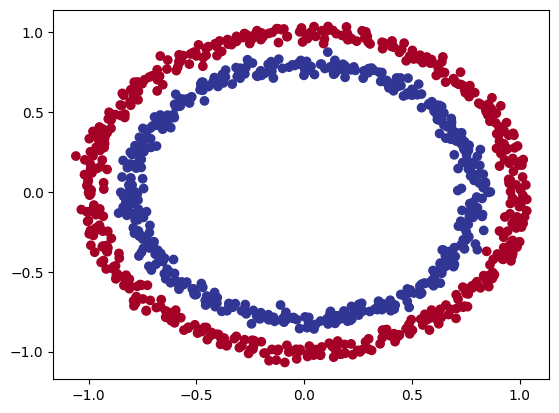

In [18]:
import matplotlib.pyplot as plt

# Plotting the data
plt.scatter(x=x[:, 0],
            y=x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [19]:
from sklearn.model_selection import train_test_split
import torch
x=torch.from_numpy(x).to(torch.float)
y=torch.from_numpy(y).to(torch.float)
x_train, x_test, y_train, y_split=train_test_split(x,y,test_size=0.2, random_state=42)

In [20]:
x_test[0:20]

tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438],
        [ 0.6323, -0.5711],
        [ 0.8561,  0.5499],
        [ 1.0034,  0.1903],
        [-0.7489, -0.2951],
        [ 0.0538,  0.9739],
        [-0.4702,  0.7875],
        [-0.2169,  0.7242],
        [ 0.9703,  0.3669],
        [-0.5845, -0.5741],
        [-0.9115, -0.2463],
        [ 0.7689, -0.0732],
        [ 0.3841,  0.6830],
        [-0.6836,  0.7142],
        [-0.5778,  0.5365],
        [-0.8327,  0.4662]])

In [21]:
from torch import nn

# The more OOP way to make a model
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.l1=nn.Linear(in_features=2, out_features=10)
        self.l2=nn.Linear(in_features=10, out_features=1)

    def forward(self, x) -> torch.Tensor:
        x=self.l1(x)
        x=self.l2(x)
        return x

In [22]:
model=CircleModel().to("cuda")
model

CircleModel(
  (l1): Linear(in_features=2, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=1, bias=True)
)

In [23]:
# sequentially, the same mode

model=nn.Sequential(
    nn.Linear(in_features=2, out_features=256),
    nn.ReLU(),
    nn.Linear(in_features=256, out_features=1),
    
).to("cuda")

model

Sequential(
  (0): Linear(in_features=2, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=1, bias=True)
)

In [24]:
# Accuracy functioion
def acc(y_corr, y_pred):
    correct=torch.eq(y_corr, y_pred).sum().item()
    accuracy=correct/len(y_pred)
    return accuracy*100

In [25]:
# choosing loss and optimizer function

loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(params=model.parameters(), lr=0.0001)

In [26]:
# training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=1000

x_train,y_train=x_train.to("cuda"),y_train.to("cuda")
x_test,y_test=x_test.to("cuda"),y_split.to("cuda")
model.to("cuda")
for epoch in range(epochs):
    model.train()

    y_logits=model(x_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))

    loss=loss_fn(y_logits,y_train)

    accuracy=acc(y_corr=y_train,y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits=model(x_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))
        test_loss=loss_fn(test_logits, y_test)
        test_accuracy=acc(y_test, test_pred)
        print(f"Epoch: {epoch}, Train Accuracy: {accuracy}, Test Accuracy: {test_accuracy}")



Epoch: 0, Train Accuracy: 49.25, Test Accuracy: 46.5
Epoch: 1, Train Accuracy: 49.25, Test Accuracy: 46.5
Epoch: 2, Train Accuracy: 49.5, Test Accuracy: 46.5
Epoch: 3, Train Accuracy: 49.625, Test Accuracy: 46.5
Epoch: 4, Train Accuracy: 49.875, Test Accuracy: 47.0
Epoch: 5, Train Accuracy: 49.75, Test Accuracy: 47.0
Epoch: 6, Train Accuracy: 49.875, Test Accuracy: 47.0
Epoch: 7, Train Accuracy: 50.0, Test Accuracy: 47.0
Epoch: 8, Train Accuracy: 49.875, Test Accuracy: 47.0
Epoch: 9, Train Accuracy: 49.75, Test Accuracy: 47.0
Epoch: 10, Train Accuracy: 49.625, Test Accuracy: 47.0
Epoch: 11, Train Accuracy: 49.625, Test Accuracy: 46.5
Epoch: 12, Train Accuracy: 49.75, Test Accuracy: 46.5
Epoch: 13, Train Accuracy: 49.875, Test Accuracy: 46.5
Epoch: 14, Train Accuracy: 50.0, Test Accuracy: 47.0
Epoch: 15, Train Accuracy: 50.125, Test Accuracy: 47.0
Epoch: 16, Train Accuracy: 50.375, Test Accuracy: 47.0
Epoch: 17, Train Accuracy: 50.375, Test Accuracy: 47.0
Epoch: 18, Train Accuracy: 50.2

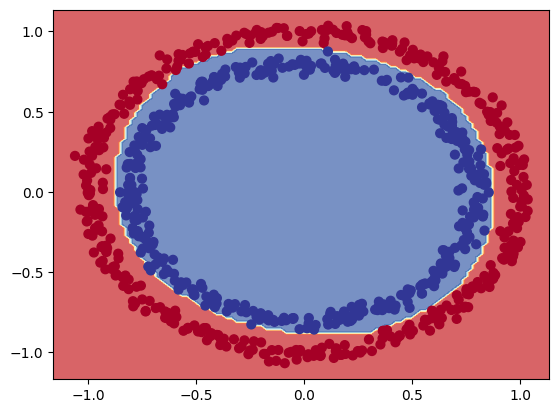

In [27]:
from helper import plot_decision_boundary

# Visualizing our model with decision boundaries

# For training set
plot_decision_boundary(model=model,X=x_train,y=y_train)

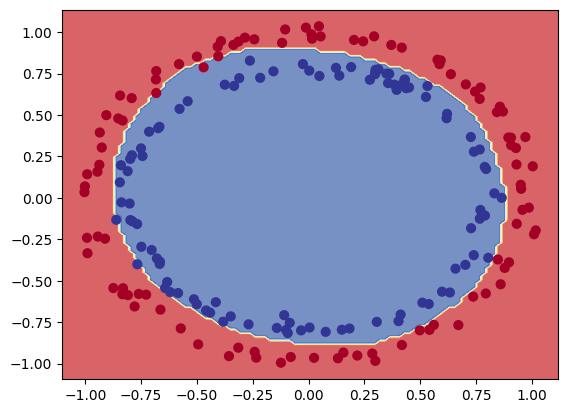

In [28]:
# for test set
plot_decision_boundary(model=model,X=x_test,y=y_test)